# Παράδειγμα Μουσικής Σύνθεσης με χρήση LSTM

Το χτίσιμο μιας εφαρμογής που παράγει μουσικές ακολουθίες  απαιτεί κάποια συγκεκριμένα βήματα. Αρχικά οι μελωδίες που θα χρησιμοποιήσουμε ως είσοδο του προγράμματος πρέπει να έχουν μια συμβολική μορφή αναγνωρίσιμη από υπολογιστή, όπως **MIDI** αρχεία. Στη συνέχεια πρέπει να εξαγάγουμε τη μουσική πληροφορία από αυτή, να δημιουργήσουμε μουσικές ακολουθίες και τέλος να χτίσουμε το νευρωνικό μας δίκτυο που θα εκπαιδευτεί πάνω σε αυτές. Ευτυχώς υπάρχουν open source εργαλεία όπως η **Python** , η **Tensorflow** , το **Keras**  και το **Musescore**  που μας κάνουν τη ζωή πολύ πιο εύκολη. 

Να σημειωθεί πως το παρακάτω παράδειγμα είναι βασισμένο στη σειρά βίντεο, στο YouTube, του Valerio Velardo .

https://www.youtube.com/playlist?list=PL-wATfeyAMNr0KMutwtbeDCmpwvtul-Xz

Προγράμματα και βιβλιοθήκες Python που χρησιμοποιήθηκαν:

**Προγράμματα και γλώσσα προγραμματισμού:**
1. Anaconda 
1. Python     3.7.7
3. Musescore 3

Το πρόγραμμα Musescore 3 χρησιμοποιήθηκε για την εικονική αναπαράσταση παρτιτούρων παρακάτω και για την αναπαραγωγή των αποτελεσμάτων. Περισσότερες πληροφορίες στο παρακάτω link:
https://web.mit.edu/music21/doc/moduleReference/moduleEnvironment.html

**Βιβλιοθήκες Python**
1. Numpy      1.18.5
2. Matplotlib 3.2.2
3. Keras      2.4.3
4. Τensorflow 2.2.0
5. Music21    5.7.0


## Προ επεξεργασία δεδομένων

Θα χρησιμοποιήσουμε 1700 παραδοσιακά γερμανικά τραγούδια από τη [Essen Associative Code and Folksong](http://www.esac-data.org/) βάση δεδομένων για την εκπαίδευση του νευρωνικού δικτύου.  Θέλουμε, στο τέλος, το δίκτυο μας να παράγει μελωδίες που να μοιάζουν σε μορφή και αρμονία με αυτά. Τα τραγούδια είναι κωδικοποιημένα σε συμβολική αναπαράσταση KRN . Αυτό δεν είναι πρόβλημα από τη στιγμή που τα εργαλεία που χρησιμοποιούμε μπορούν να επεξεργαστούν τέτοιου είδους μουσικής αναπαράστασης. Όλα τα κομμάτια είναι μονοφωνικά, δηλαδή περιλαμβάνουν μόνο μια μελωδική γραμμή. 

Τα βήματα που θα πάρουμε για την προ επεξεργασία των δεδομένων μας είναι τα εξής:
1.	Φόρτωμα δεδομένων με χρήση της Music21 βιβλιοθήκης.
2.	Φιλτράρισμα των τραγουδιών σύμφωνα με προκαθορισμένες παραμέτρους.
3.	Μετατροπία όλων στην ίδια κλίμακα.
4.	Κωδικοποίηση των δεδομένων σε μουσικές χρονοσειρές (time series representation).
5.	Αποθήκευση αυτών σε ένα αρχείο.
6.	Προετοιμασία των ακολουθιών για εισαγωγή στο δίκτυο.

### Φόρτωμα δεδομένων με χρήση της Music21 βιβλιοθήκης

Κατεβάστε τα δεδομένα από: https://kern.humdrum.org/cgi-bin/browse?l=essen/europa/deutschl
Και αποθηκεύστε 'τα στο φάκελο που βρίσκεται αυτό το αρχείο

In [1]:
import os
import music21 as m21

Το path για τα δεδομέναν μας. Χρησιμοποιούμε το φάκελο erk.

In [2]:
KERN_DATASET_PATH = "deutschl/erk"

In [3]:
def load_songs_in_kern(dataset_path):
    songs = []
    #πηγαινέ σε όλα τα αρχεία σου και φόρτωσέ τα στη Music21
    for path, subdirs, files in os.walk(dataset_path):
        for file in files:
            if file[-3:] == "krn":
                song = m21.converter.parse(os.path.join(path, file))
                songs.append(song)
                
    return songs    

In [9]:
songs = load_songs_in_kern(KERN_DATASET_PATH)
print(f"Loaded {len(songs)} songs.")

Loaded 1700 songs.


Tα δεδομένα μας αποτελούνται από 1700 τραγούδια.
Το πρώτο τραγούδι από αυτά φαίνεται παρακάτω.

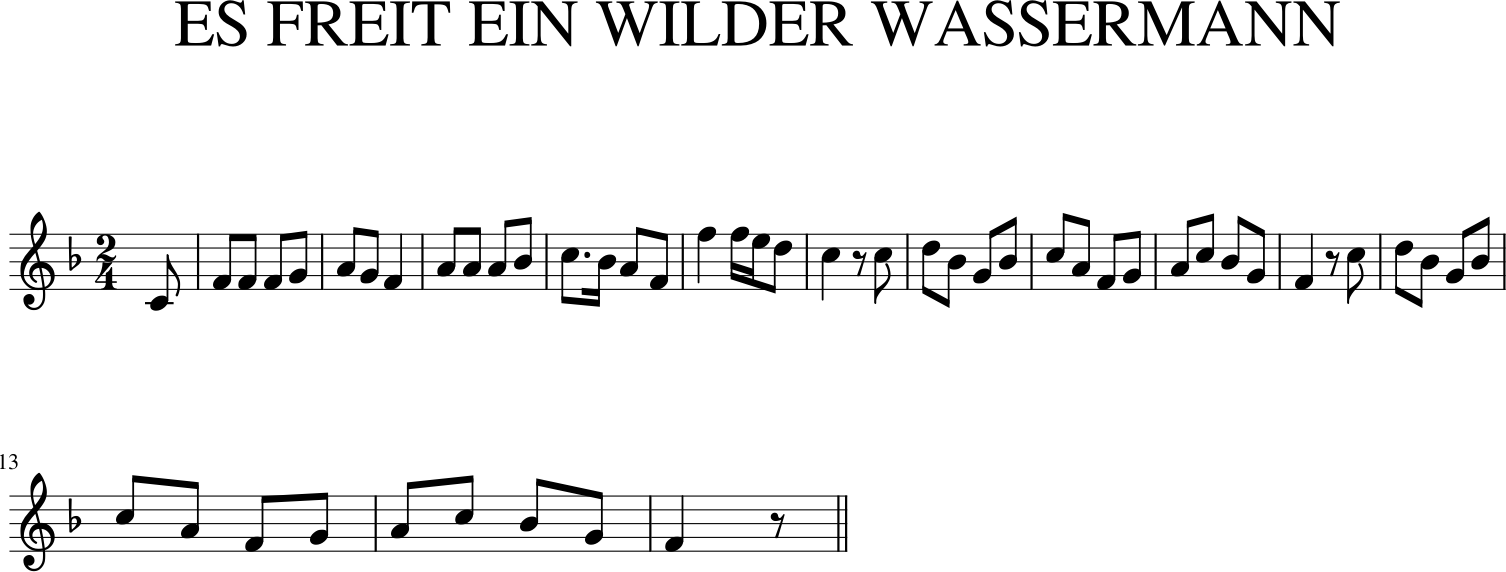

In [11]:
song = songs[0]
song.show()

Ένα music21 αντικείμενο ονομάζετε music21.stream. Ο τρόπος που καταγράφονται τα ονόματα των νοτών σε αυτό το αντικείμενο φαίνεται παρακάτω.

In [22]:
print(song)
for note in song.flat.notesAndRests:
    print(note)

<music21.stream.Score 0x1d4e4639fc8>
<music21.note.Note C>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note F>
<music21.note.Note E>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Rest rest>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note C>
<music21.note.Note A>
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note C>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note F>
<music21.note.Rest rest>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note B->
<music21.note.Note G>
<music21.note.Note B->
<music21.note.Note C>
<mus

### Φιλτράρισμα των τραγουδιών σύμφωνα με προκαθορισμένες παραμέτρους.

Στη συνέχεια θέλουμε να φιλτράρουμε τα τραγούδια μας σύμφωνα με προκαθορισμένες παραμέτρους. Θα κρατήσουμε τραγούδια τα οποία περιέχουν μόνο συγκεκριμένες χρονικές αξίες. Αυτές είναι το ολόκληρο, μισό, τέταρτο, όγδοο και δέκατο έκτο. Περιορίζουμε την ποσότητα χρονικών αξίων για να διευκολύνουμε το πρόγραμμα μας στο να κατανοήσει τις διαφορές μεταξύ τους και τον τρόπο που αυτές πρέπει να χρησιμοποιούνται μέσα σε ένα μουσικό κομμάτι. Η συνάρτηση που ακολουθεί, has_acceptable_durations(), θα μας βοηθήσει, όταν δημιουργήσουμε το τελικό μας αρχείο, να αποφασίσουμε ποια τραγούδια έχουν τις επιθυμητές χρονικές αξίες. 

In [4]:
# επιθυμητές χρονικές αξίες
ACCEPTABLE_DURATIONS = [
    0.25, #δέκατο έκτο
    0.5,  #όγδοο
    0.75,
    1.0,  #τέταρτο
    1.5,
    2,    #μισό
    3,
    4     #ολόκληρο
]

In [5]:
#μια συνάρτηση που βγάζει true αν το τραγουδι μας έχει τις επιθυμητές χρονικές αξίες. 
def has_acceptable_duration(song, acceptable_durations):
    for note in song.flat.notesAndRests:
        if note.duration.quarterLength not in acceptable_durations:
            return False
    return True

Το 6ο τραγούδι από τα δεδομένα μας έχει τις επιθυμητές χρονικές αξίες.

In [25]:
song = songs[5]
print(f"Has acceptable duration? {has_acceptable_duration(song, ACCEPTABLE_DURATIONS)}")

Has acceptable duration? True


### Μετατροπία

Τώρα θέλουμε να μετατρέψουμε όλα μας τα κομμάτια στην ίδια τονικότητα. Με αυτό το τρόπο κανονικοποιούμε (normalization) τα δεδομένα μας. Γενικά στην στατιστική normalization σημαίνει τη προσαρμογή τιμών που μετρούνται σε διαφορετικές κλίμακες σε μια θεωρητικά κοινή κλίμακα . Στη περίπτωση μας θα μετατρέψουμε όλα τα κομμάτια που είναι γραμμένα σε μείζονα κλίμακα στην Ντο μείζονα(Cmaj) και όλα που είναι σε ελάσσονες στην Λα ελάσσονα(Amin). To music21.stream αντικείμενο έχει είδη μέσα του την πληροφορία για την κλίμακα που είναι γραμμένο κάθε κομμάτι. Σε κάποιες περιπτώσεις όμως η τονικότητα δεν υπήρχε στην αρχική συμβολική αναπαράσταση, πρέπει λοιπόν να την υπολογίσουμε εμείς. Η music21 το καταφέρνει αυτό με τη μέθοδο **Stream.analyze**. Αφού βρούμε το κλειδί, στη συνέχεια πρέπει να υπολογίσουμε την απόσταση μεταξύ της τονικής και των κλιμάκων Ντο μείζονά και Λα ελάσσονα για να κάνουμε τη μετατροπία. Αυτό γίνεται με τις μεθόδους **music21.interval.Interval** και **Stream.transpose**. 

In [6]:
def transpose(song):
    #πάρε την κλίμακα απο κάθε τραγούδι
    parts = song.getElementsByClass(m21.stream.Part)
    measures_part0 = parts[0].getElementsByClass(m21.stream.Measure)
    key = measures_part0[0][4]
    #αν δεν υπάρχει αυτή η πληροφορία υπολόγισε τη πιθανή κλίμακα
    if not isinstance(key, m21.key.Key):
        key = song.analyze("key")
    #βρές την απόσταση μεταξύ της τονικής και των Cmaj και Amin
    if key.mode == "major":
        interval = m21.interval.Interval(key.tonic, m21.pitch.Pitch("C"))
    elif key.mode == "minor":
        interval = m21.interval.Interval(key.tonic, m21.pitch.Pitch("A"))
    #κάνε μετατροπία με χρήση αυτής της απόστασης
    transposed_song = song.transpose(interval)
    
    return transposed_song

**Παράδειγμα:**
Το πάνω τραγούδι είναι το αυθεντικό γραμμένο σε Φα μείζονα ενώ το κάτω είναι η μετατροπία του σε C μείζονα.

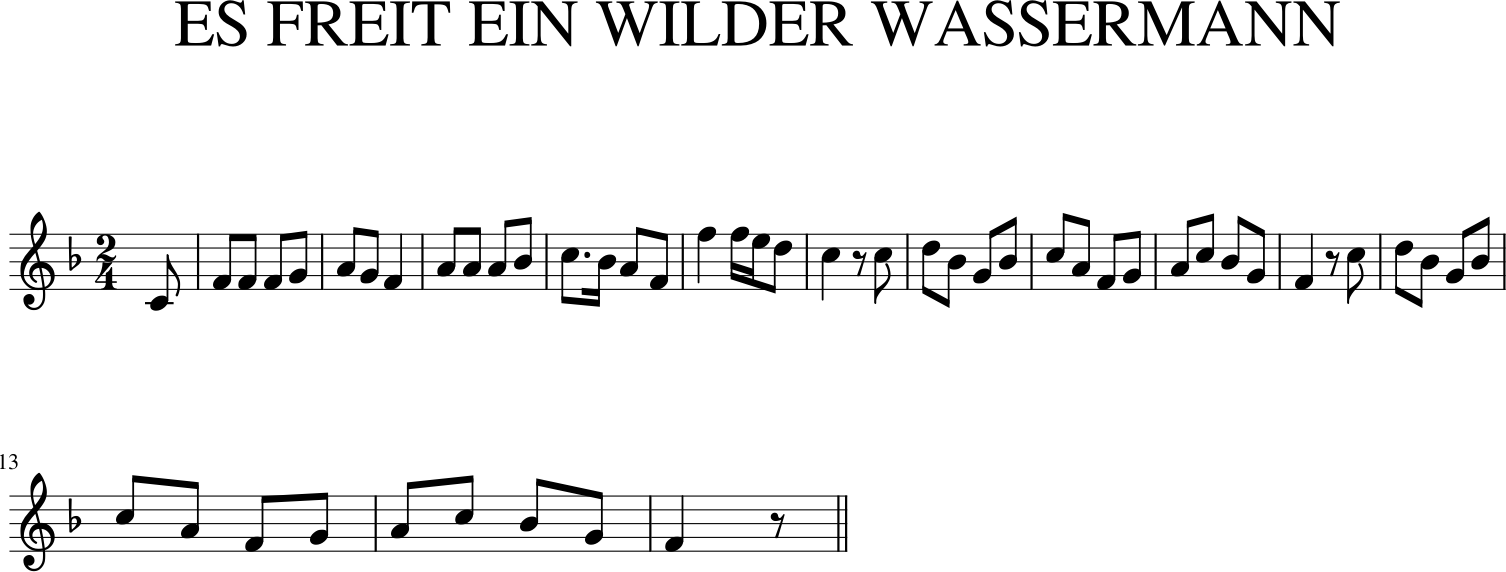

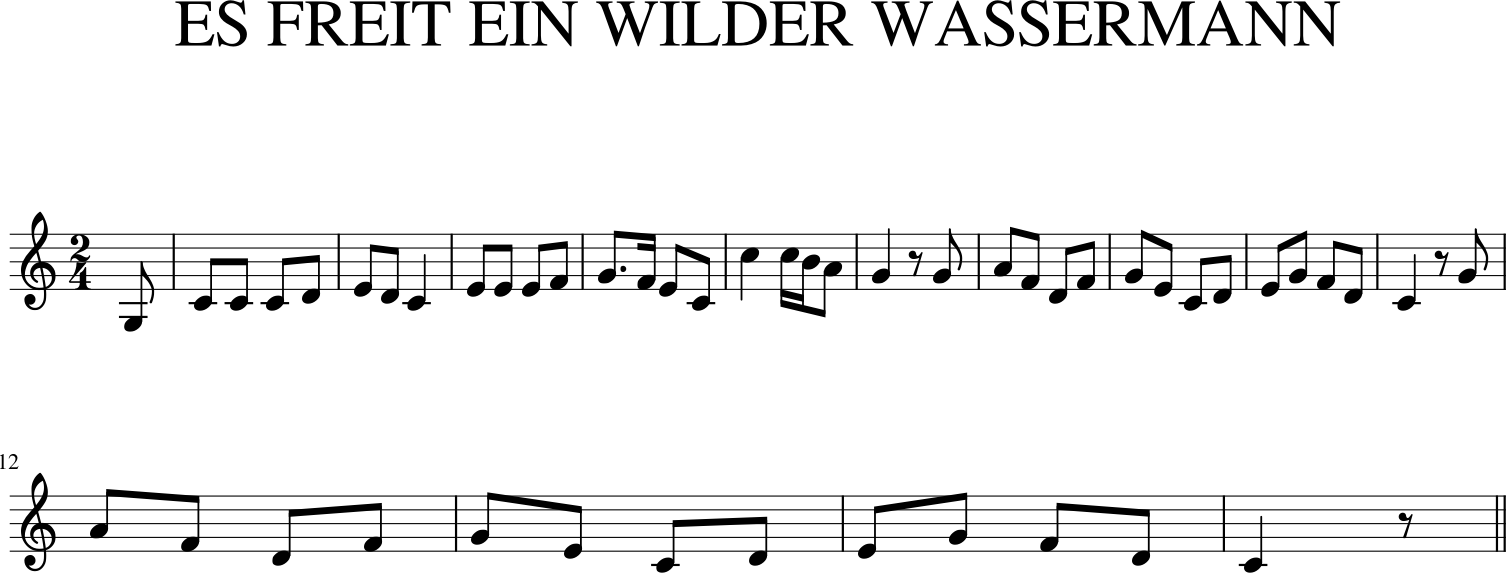

In [24]:
transposed_song = transpose(song)
song.show()
transposed_song.show()

### Δημιουργία των χρονολογικών σειρών

Σε αυτό το σημείο θα δημιουργήσουμε τις ακολουθίες που θα εισάγουμε το νευρωνικό μας δίκτυο.  Αυτές οι ακολουθίες θα έχουν την μορφή μιας χρονολογικής σειράς (**time series**). Αυτή δεν είναι τίποτα άλλο πάρα μια ακολουθία που λαμβάνεται σε διαδοχικές ισαπέχουσες χρονικές στιγμές. 

 Η μικρότερη χρονική στιγμή, ή αξία, που έχουμε στα κομμάτια μας είναι το **δέκατο έκτο** λόγου του φιλτραρίσματος που κάναμε προηγουμένως.  Θα χωρίσουμε λοιπόν το κάθε τραγούδι σε ισαπέχουσες αξίες δέκατου έκτου. Συνοπτικά, ένας φθόγγος με αξία τετάρτου θα ισούται με τέσσερα βήματα στην ακολουθία.  Ένα παράδειγμα φαίνεται στην παρακάτω εικόνα.

<img src="images/time_series_from_notes.png" alt="Δημιουργία time series από μελωδία." style="width:600px;height:450px;">

Η πρώτη νότα είναι η Ντο, με midi number 60, και έχει αξία ενός τετάρτου. Τα πρώτα τέσσερα λοιπόν στοιχεία της ακολουθίας θα είναι **[“60”,”_”,”_”,”_”,...]** . Σημειώστε πως τα “ ” δηλώνουν string. Για να αντιπροσωπεύσουμε μια παύση στη σειρά μας, επειδή δεν έχουν midi αριθμούς, θα χρησιμοποιήσουμε το γράμμα “r”.  Παρακάτω παρουσιάζετε ο κώδικας, encode_song(), που κάνει την παραπάνω διεργασία.

In [7]:
def encode_song(song, time_step = 0.25):
    encoded_song = []
    
    for event in song.flat.notesAndRests:
        
        #νότες
        if isinstance(event, m21.note.Note):
            symbol = event.pitch.midi # 60
        #παύσεις
        elif isinstance(event, m21.note.Rest):
            symbol = "r"
        #μετάτρεψε τη νότα/πα΄ύση σε συμβολισμό χρονοσειρών
        steps = int(event.duration.quarterLength / time_step)
        
        for step in range(steps):
            if step == 0:
                encoded_song.append(symbol)
            else:
                encoded_song.append("_")  
    # δημιούργησε ένα string με το κωδικοποιημένο τραγούδι
    encoded_song = " ".join(map(str, encoded_song))
    
    return encoded_song

Και η αναπαράσταση του 6ο τραγουδιού σε time series φαίνεται παρακάτω

62 _ 67 _ 67 _ 69 67 69 72 71 _ 71 69 67 _ _ _ 71 69 71 72 74 _ 76 _ 72 _ 74 72 71 _ 71 72 74 _ 69 _ 71 _ 67 71 69 67 66 64 62 _ 64 66 67 _ _ 62 59 _ 62 _ 67 _ _ _ r _ 71 72 74 _ 69 _ 71 _ 67 71 69 67 66 64 62 _ 64 66 67 _ _ 62 59 _ 62 _ 67 _ _ _ r _


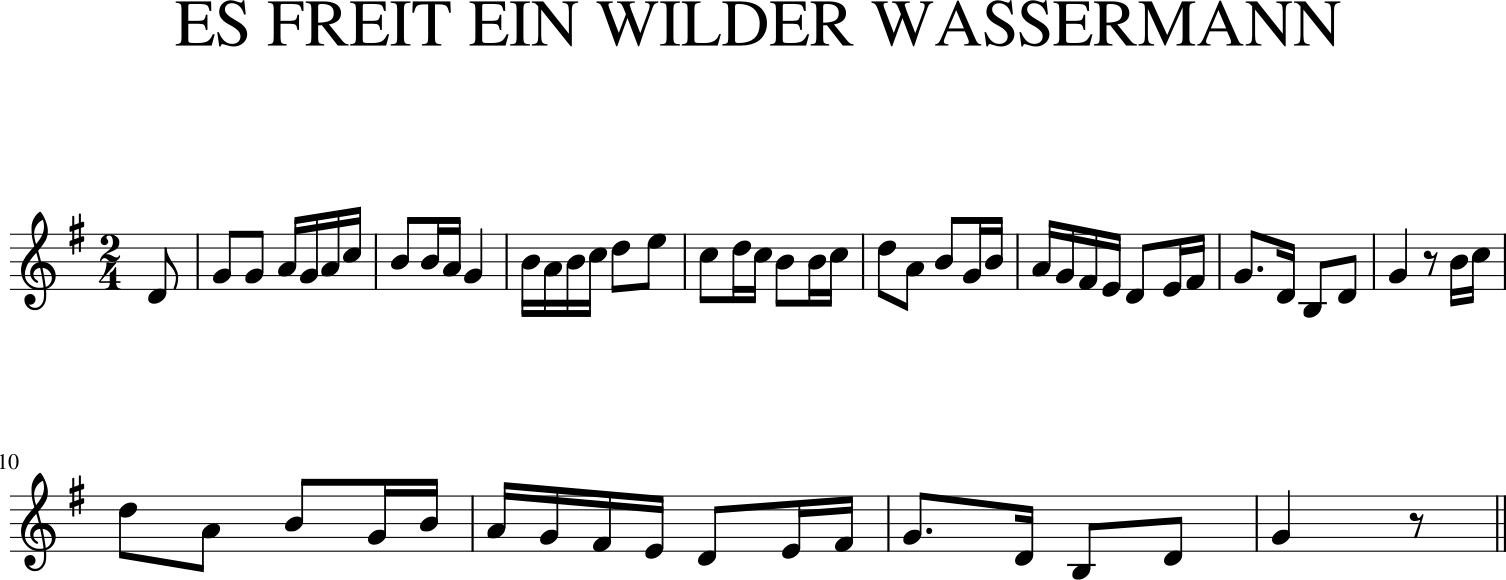

In [32]:
print(encode_song(song))
song.show()

###  Αποθήκευση των τραγουδιών σε text files ξεχωριστά. Εισαγωγή οριοθετών στο τέλος κάθε τραγουδιού και τελική αποθήκευση όλων σε ένα αρχείο.

Το επόμενο βήμα είναι να εισάγουμε οριοθέτες στο τέλος κάθε ακολουθίας για να δηλώσουμε το πότε τελειώνει το κάθε τραγούδι. Θα το κάνουμε αυτό με την εισαγωγή του χαρακτήρα “/” 64 φορές στο τέλος κάθε σειράς. Στη συνέχεια θα πάρουμε όλες τις ακολουθίες και θα της φορτώσουμε σε ένα μοναδικό αρχείο. 

Αρχικά ορίζουμε τη συνάρτηση, **preprocess()**, που καλεί όλες τις συναρτήσεις που είδη περιγράψαμε και δημιουργεί ένα αρχείο για κάθε τραγούδι. 

In [8]:
# το path το φακέλου που θα αποθηκεύσουμε τα text files με τα τραγούδια μας
SAVE_DIR = "dataset_thesis"

In [9]:
def preprocess(dataset_path):
    #φόρτωση τραγουδιών
    print("Loading Songs...")
    songs = load_songs_in_kern(dataset_path)
    print(f"Loaded {len(songs)} songs.")
    
    for i, song in enumerate(songs):  
        #η μέθοδος φιλτραρίσματος
        if not has_acceptable_duration(song, ACCEPTABLE_DURATIONS):
            continue    
        # ο μετασχηματισμός
        song = transpose(song)
        #κωδικοποίηση σε time series
        encoded_song = encode_song(song)
        #αποθήκευση σε διαφορετικά text file
        save_path = os.path.join(SAVE_DIR, str(i))
        with open(save_path, "w") as fp:
            fp.write(encoded_song)

In [35]:
preprocess(KERN_DATASET_PATH)

Loading Songs...
Loaded 1700 songs.


Στη συνέχεια θα πάρουμε όλες τις ακολουθίες από αυτά τα αρχεία, θα εισάγουμε τον οριοθέτη και τα αποτελέσματα θα τα αποθηκεύσουμε σε ένα μοναδικό αρχείο. 

In [10]:
#Συνάρτηση για φόρτωμα αρχείων
def load(file_path):
    with open(file_path, "r") as fp:
        song = fp.read()
    return song

In [11]:
SINGLE_FILE_DATASET = "file_dataset_thesis" #το αρχείο που θα περιέχει όλες τις ακολουθίες
SEQUENCE_LENGTH = 64 #μεταβλητή για την οριοθέτηση αλλα και για το μέγεθος των time series που θα εισάγουμε στο δίκτυο

In [12]:
def create_single_file_dataset(dataset_path, file_dataset_path, sequence_length):
    #η οριοθέτηση με το χαρακτ΄ήρα "/"
    new_song_delimiter = "/ " * sequence_length
    songs = ""
    #φόρτωσε τα κωδικοποιημένα τραγούδια και πρόσθεσε το "/"
    for path, _, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(path, file)
            song = load(file_path)
            songs = songs + song + " " + new_song_delimiter
    songs = songs[:-1] #για να μην πάρουμε το τελευταίο κενό
    
    #σώσε κάθε string σε ένα αρχείο
    with open(file_dataset_path, "w") as fp:
        fp.write(songs)
    
    return songs

In [39]:
songs = create_single_file_dataset(SAVE_DIR, SINGLE_FILE_DATASET, SEQUENCE_LENGTH)

### To λεξικό

Το τελευταίο βήμα της προ-επεξεργασίας δεδομένων είναι να μετατρέψουμε τις ακολουθίες μας σε ακέραιους αριθμούς γιατί τα νευρωνικά δίκτυα δεν μπορούν να επεξεργαστούν γραμματοσειρές (strings). Αρχικά θα δημιουργήσουμε ένα λεξικό (**dictionary**) που θα περιλαμβάνει τις αντιστοιχίες μεταξύ χαρακτήρα και αριθμού. Για να το κάνουμε αυτό πρέπει πρώτα να προσδιορίσουμε το λεξιλόγιο (**vocabulary**) μας. Σκεφτείτε το αρχείο με τις ακολουθίες που δημιουργήσαμε προηγουμένως σαν ένα κείμενο, και εμείς πρέπει να βρούμε ποιες λέξεις υπάρχουν μέσα σε αυτό.  

In [134]:
import json
MAPPING_PATH = "mapping.json" #αρχείο για την αποθήκευση του λεξικού

In [14]:
def create_mapping(songs, mapping_path):
    mappings = {}
    
    #βρές το λεξιλόγιο
    songs = songs.split()
    vocabulary = list(set(songs))
    
    #δημιο΄ύργησε τις αντιστοιχίες λέξης -> αριθμός 
    for i, symbol in enumerate(vocabulary):
        mappings[symbol] = i
    print(mappings)    
    #σώσε το λεξικό σε ένα json file
    with open(mapping_path, "w") as fp:
        json.dump(mappings, fp, indent=4)

In [42]:
create_mapping(songs, MAPPING_PATH)

{'61': 0, '53': 1, '74': 2, '57': 3, '65': 4, '69': 5, '76': 6, '70': 7, '68': 8, '73': 9, '55': 10, '72': 11, '48': 12, '_': 13, '54': 14, '45': 15, '81': 16, '71': 17, '52': 18, '77': 19, '47': 20, 'r': 21, '67': 22, '50': 23, '78': 24, '56': 25, '58': 26, '/': 27, '75': 28, '64': 29, '63': 30, '80': 31, '59': 32, '66': 33, '51': 34, '79': 35, '62': 36, '60': 37}


Παραπάνω βλέπουμε το τρόπο που με τη συνάρτηση **create_mapping()** δημιουργήσαμε το λεξικό μας. Για παράδειγμα η νότα με midi αριθμό ‘61’ τώρα θα αντιστοιχεί στον αριθμό 0, με ‘53’ στον αριθμό 1, μια παύση (‘r’) στο 21 κ.ο.κ. 

Στη συνέχεια θα μετατρέψουμε όλες τις ακολουθίες σε ακεραίους με τη παρακάτω συνάρτηση, convert_songs_to_int().

In [15]:
def convert_songs_to_int(songs):
    int_songs = []
    # φ΄όρτωσε το λεξικό
    with open(MAPPING_PATH, "r") as fp:
        mappings = json.load(fp)
    # δημιουργεία λίστας για κάθε τραγούδι
    songs = songs.split()
    # αντιστοίχισε λέξη -> αριθμό
    for symbol in songs:
        int_songs.append(mappings[symbol])
    return int_songs

In [20]:
one_song_path = "dataset_thesis/5"
one_song = load(one_song_path)
print("H time series του 6ου τραγουδιού\n")
print(one_song)
print("\nΗ αναπαράστασή της με ακεραίους\n")
print(convert_songs_to_int(one_song))

H time series του 6ου τραγουδιού

55 _ 60 _ 60 _ 62 60 62 65 64 _ 64 62 60 _ _ _ 64 62 64 65 67 _ 69 _ 65 _ 67 65 64 _ 64 65 67 _ 62 _ 64 _ 60 64 62 60 59 57 55 _ 57 59 60 _ _ 55 52 _ 55 _ 60 _ _ _ r _ 64 65 67 _ 62 _ 64 _ 60 64 62 60 59 57 55 _ 57 59 60 _ _ 55 52 _ 55 _ 60 _ _ _ r _

Η αναπαράστασή της με ακεραίους

[10, 13, 37, 13, 37, 13, 36, 37, 36, 4, 29, 13, 29, 36, 37, 13, 13, 13, 29, 36, 29, 4, 22, 13, 5, 13, 4, 13, 22, 4, 29, 13, 29, 4, 22, 13, 36, 13, 29, 13, 37, 29, 36, 37, 32, 3, 10, 13, 3, 32, 37, 13, 13, 10, 18, 13, 10, 13, 37, 13, 13, 13, 21, 13, 29, 4, 22, 13, 36, 13, 29, 13, 37, 29, 36, 37, 32, 3, 10, 13, 3, 32, 37, 13, 13, 10, 18, 13, 10, 13, 37, 13, 13, 13, 21, 13]


## Το νευρωνικό δίκτυο

Σε αυτό το σημείο είμαστε σχεδόν έτοιμοι να χτίσουμε το δίκτυο μας. Αρχικά πρέπει να δημιουργήσουμε τα δείγματα εκπαίδευσης (**training samples**) του LSTM δικτύου. Αυτά ουσιαστικά θα είναι υποσύνολα των χρονοσειρών μας. 

Το είδος του προβλήματος που προσπαθούμε να λύσουμε κατατάσσεται στη κατηγορία προβλημάτων επιβλεπόμενης μάθησης (**Supervised learning problems**) . Η Επιβλεπόμενη μάθηση είναι μια κατηγορία μηχανικής μάθησης, ο στόχος της οποίας είναι ο χαρακτηρισμός δεδομένων με βάση κάποια δεδομένα εκπαίδευσης. Αυτά αποτελούνται από ένα σύνολο παραδειγμάτων (**training samples**), που το καθένα περιέχει ένα σύνολο εισόδου και μια επιθυμητή τιμή εξόδου (ο στόχος ή **target**). 

### Παραγωγή εισόδου και target 

Τα υποσύνολα των χρονοσειρών μας θα περιέχουν ακριβώς αυτό. Μια ακολουθία εισόδου που θα περιλαμβάνει ένα προκαθορισμένο αριθμό δειγμάτων και τιμή εξόδου που θα περιέχει το αμέσως επόμενο στοιχείο της ακολουθίας. Για παράδειγμα έστω πως έχουμε τη σειρά [11, 12, 13, 14, ...] και θέλουμε υποσύνολα μεγέθους 2. Οι είσοδοι και οι στόχοι μας θα είναι:

1.	Είσοδος: [11, 12], Στόχος: [13]
2.	Είσοδος: [12, 13], Στόχος: [14]
3.	Είσοδος: [13, 14], Στόχος:  … κ.ο.κ


Αυτό το διάνυσμα [Είσοδος, Στόχος] είναι τα δεδομένα εκπαίδευσης του δικτύου μας. Ουσιαστικά το LSTM δίκτυο θα προσπαθήσει να μάθει τις σχέσεις εισόδου-στόχου για να παράγει στο τέλος στόχους σύμφωνα με μια είσοδο που θα του δώσουμε εμείς. Ένα παράδειγμα αυτής της διαδικασίας φαίνεται στη παρακάτω εικόνα. 

<img src="images/input_target.png" alt="Η διαδικασία πρόβλεψης της επόμενης νότας." style="width:600px;height:350px;">

Μια υλοποίηση παραγωγής παραδειγμάτων εκπαίδευσης φαίνεται στη συνάρτηση **generate_training_sequences()**. 
Κάθε ακολουθία εκπαίδευσης θα περιέχει 64 στοιχεία. Ο αριθμός των ακολουθιών δίνεται από τη σχέση
 

$$numofsymbols-sequencelength$$  

Για παράδειγμα, έστω πως το αρχείο έχει 100 σύμβολα και το μήκος ακολουθίας είναι 64, τότε θα παράγουμε 36 ακολουθίες.

Αφού δημιουργήσουμε τις ακολουθίες που θα εκπαιδεύσουμε το LSTM, θα κωδικοποιήσουμε τις εισόδους μας σε **One-hot encoding**. Συνοπτικά το κάνουμε αυτό για να αποφύγουμε τυχών προκαταλήψεις (**bias**) που μπορεί να αποκτήσει ένα μοντέλο όταν διαχειρίζεται αριθμητικές τιμές, για παράδειγμα να υποθέσει μια φυσική σειρά στους αριθμούς 10<11<12<13… , κάτι που δεν υπάρχει στη μουσική(η νότα Ντο δεν είναι μεγαλύτερη από την Σολ). 

Αυτή η κωδικοποίηση αφαιρεί κάθε ακέραια μεταβλητή και στη θέση της προσθέτει μια νέα δυαδική

In [65]:
import tensorflow as tf
import numpy as np

In [66]:
def generate_training_sequences(sequence_length):
    # φόρτωσε τα τραγούδια και μετέτρεψέ τα σε ακεραίους
    songs = load(SINGLE_FILE_DATASET)
    int_songs = convert_songs_to_int(songs)
    
    # παραγωγή ακολουθιών εκπαίδευσης
    inputs = []
    targets = []
    num_sequences = len(int_songs) - sequence_length #πλήθος ακολουθιών
    for i in range(num_sequences):
        inputs.append(int_songs[i:i+sequence_length])
        targets.append(int_songs[i+sequence_length])
        
    # one-hot encode τις ακολουθίες
    # Διάσταση εισόδου πριν: inputs: (# of sequences, sequence length)
    # Διάσταση εισόδου μετά: inputs: (# of sequences, sequence length, vocabulary size)
    vocabulary_size = len(set(int_songs)) # 38
    inputs = tf.keras.utils.to_categorical(inputs, num_classes = vocabulary_size)
    targets = np.array(targets)
    
    print(f"There are {len(inputs)} sequences.")    
    return inputs, targets

In [67]:
inputs, targets = generate_training_sequences(SEQUENCE_LENGTH)

There are 362178 sequences.


Όπως φαίνεται δημιουργήσαμε 362.178 ακολουθίες

### LSTM

Τώρα που έχουμε τις εισόδους μπορούμε να σχεδιάσουμε το LSTM δίκτυο. Με χρήση της βιβλιοθήκης Keras αυτή η διαδικασίας είναι πολύ εύκολη. 

Ένα μοντέλο Keras δημιουργείται πάντοτε με τα παρακάτω τρία βήματα:
1.	Ορισμός του μοντέλου
2.	Compile.
3.	Fit.

Ο ορισμός του μοντέλου σημαίνει να ορίσουμε την αρχιτεκτονική του δικτύου. Στη δικιά μας περίπτωση θα έχει τη παρακάτω δομή:
* Ένα input layer με διαστάσεις 362178 × 64 × 38. Ίδιο με το μέγεθος των ακολουθιών μας δηλαδή.
* Ένα LSTM layer με 256 cell states και εξόδους.
* Ένα Dropout layer με dropout rate 0.2 για να αποφύγουμε **overfitting**. 
* Και ένα output layer με 38 εξόδους.


Overfitting συμβαίνει όταν το μοντέλο μας κάνει πολύ καλές προβλέψεις με τα δεδομένα που εκπαιδεύτηκε (δηλαδή τις πραγματικές τιμές) αλλά αναξιόπιστες προβλέψεις με μελλοντικά καινούργια δεδομένα . 

Στο στάδιο compile ορίζουμε τη συνάρτηση κόστους (**loss function**), τον **optimizer** και τα **metrics**. Εμείς χρησιμοποιούμε ως συνάρτηση κόστους την **sparse categorical crossentropy** , τον optimizer **Adam**  με **learning rate** = 0.001 και για metrics θέλουμε να δούμε την ακρίβεια (**accuracy**) για να κρίνουμε την απόδοση του μοντέλου μας. 

Στη fit κάνουμε την εκπαίδευση του μοντέλου μας με τις δεδομένες εισόδους και τους αντίστοιχους στόχους εκπαίδευσης. 

Παράμετροι όπως το learning rate, dropout rate, LSTM units, epochs (πόσες φορές θα περάσουμε ολόκληρο το σύνολο δεδομένων), batches (πόσα δείγματα θα περάσουν κάθε epoch πριν από την ενημέρωση των παραμέτρων του μοντέλου), ονομάζονται **hyperparameters**.

In [62]:
import tensorflow as tf

In [ ]:
# ένα callback για να σταματήσει η εκπαίδευση όταν δούμε 90% accuracy
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

Τα **Hyperparameters**.

In [71]:
OUTPUT_UNITS = 38
NUM_UNITS = [256]
LOSS = "sparse_categorical_crossentropy"
LEARNING_RATE = 0.001
EPOCHS = 1  # το έχουμε 1 για τους σκοπούς του παραδείγματος και για λόγους χρόνους εκπαίδευσης.
BATCH_SIZE = 64 
SAVE_MODEL_PATH = "model.h5"

**Build_model()** μια συνάρτηση που φτιάχνει το μοντέλο μας.

In [70]:
def build_model (output_units, num_units, loss, learning_rate):
    
    # η αρχιτεκτονική του δικτύου
    input = tf.keras.layers.Input(shape=(None, output_units))
    x = tf.keras.layers.LSTM(num_units[0])(input)
    x = tf.keras.layers.Dropout(0.2)(x)
    
    output = tf.keras.layers.Dense(output_units, activation = "softmax")(x)
    
    model = tf.keras.Model(input, output)
    
    # compile model
    model.compile(loss=loss, 
                  optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
                  metrics=["accuracy"])
    model.summary()
    
    return model

**Train()** η συνάρτηση που εκπαιδεύει το δίκτυο

In [69]:
def train(output_units = OUTPUT_UNITS, num_units = NUM_UNITS, loss = LOSS, learning_rate = LEARNING_RATE):
    
    # παραγωγή ακολουθιών εκπαίδευσης
    inputs, targets = generate_training_sequences(SEQUENCE_LENGTH)
    
    callbacks = myCallback()
    
    # Χτίσιμο δικτύου
    model = build_model(output_units, num_units, loss, learning_rate)
    
    # εκπαίδευση μοντέλου
    model.fit(inputs, targets, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[callbacks])
    
    # σώσιμο μοντέλου στο αρχείο model_thesis.h5
    model.save(SAVE_MODEL_PATH)

Η εκπάιδευση και η περίληψη του δικτύου

In [72]:
train()

There are 362178 sequences.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 38)]        0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               302080    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 38)                9766      
Total params: 311,846
Trainable params: 311,846
Non-trainable params: 0
_________________________________________________________________
5660/5660 [==============================] - 762s 135ms/step - loss: 0.6978 - accuracy: 0.7857


Παρατηρήστε στη περίληψη του δικτύου πως σε ένα Epoch έχουμε accuracy 78.5%, αλλά μας πήρε 12 λεπτά (762s) για να το τρέξουμε. Ο μεγάλος αυτό χρόνος εκτέλεσης είναι αποτέλεσμα πολλών παραμέτρων. Αρχικά εκπαιδεύουμε το δίκτυο μας με 362.178 ακολουθίες. Επίσης η δομή του παίζει μεγάλο ρόλο (αριθμός επιπέδων, hyperparameters κ.ο.κ). Και τέλος η υπολογιστική ισχύς που έχουμε στη διάθεσή μας είναι καθοριστικός παράγοντας στις ταχύτητες εκπαίδευσης νευρωνικών δικτύων. Στη εικόνα παρακάτω παρουσιάζεται η εκπαίδευση του δικτύου με 50 Epochs. Η ακρίβεια έχει φτάσει στο 92% αλλά ο χρόνος τρεξίματος ήταν περίπου 11 ώρες.

<img src="images/50_epochs.png" alt="Η ακρίβεια του δικτύου μετά απο 50 epochs." style="width:600px;height:100px;">

Μια ακρίβεια 92% ακούγεται πολύ καλή, όμως το δίκτυό μας μπορεί να κάνει overfitting. Υπάρχουν πολλές στατιστικές μέθοδοι που συνήθως χρησιμοποιούμε για να αξιολογήσουμε τα αποτελέσματα των μοντέλων μας, αλλά σε αυτή τη περίπτωση απλά θα δούμε και θα ακούσουμε τη μελωδία που το LSTM μας παράγει και θα βγάλουμε τα δικά μας συμπεράσματα. Το μοντέλο που χρησιμοποιούμε παρακάτω για μουσική σύνθεση έχει εκπαιδευτή σε 50 epochs.

## Παραγωγή μουσικής μελωδίας

Για να παράγουμε ένα μουσικό κομμάτι με το δίκτυο μας πρέπει πρώτα να του δώσουμε μια μουσική φράση. Αυτή θα την ονομάσουμε **seed** και θα έχει τη μορφή ακολουθίας **[“Pitch”,”_”,”_”,”_”,….]** που είδαμε προηγουμένως. Θα χρησιμοποιήσουμε μια κλάση (**class**) για αυτή τη διαδικασία. Συνοπτικά, η κλάση θα μας επιτρέψει να εισάγουμε τη μουσική μας φράση στο μοντέλο. Αρχικά θα τη μετατρέψει σε μορφή ακεραίων με χρήση του ήδη υπάρχοντος λεξικού, θα κάνει τη πρόβλεψη με το δίκτυο μας και θα παράγει στο τέλος μια καινούργια μελωδία. 

Πριν συνεχίσουμε με των κώδικα που κάνει τη παραπάνω διεργασία, πρέπει πρώτα να κατανοήσουμε μια πολύ σημαντική έννοια. Η έξοδος του νευρωνικού μας δεν είναι μια μόνο τιμή αλλά μια σειρά από πιθανότητες. Αυτές ουσιαστικά μας δείχνουν τη πιθανότητα της επόμενης νότας. 

Για παράδειγμα, ας υποθέσουμε πως το δίκτυο προβλέπει 4 κατηγορίες, και όχι 38 που έχουμε εμείς. Η έξοδος του μπορεί να είναι [0.4, 0.1, 0.2, 0.3]. Αμέσως καταλαβαίνουμε πως το δίκτυο θεωρεί πως η πρώτη κατηγορία, το πρώτο target, έχει τη μεγαλύτερη πιθανότητα να είναι η σωστή απόφαση. 

Επίσης παρατηρήστε πως το άθροισμα των παραπάνω πιθανοτήτων ισούται με 1. Ο λόγος για αυτό είναι επειδή χρησιμοποιήσαμε τη συνάρτηση **softmax**  ως **activation function** στην έξοδο του δικτύου. Αυτή είναι πολύ συνηθισμένη σε προβλήματα αυτού του τύπου, για ακριβώς αυτή την ικανότητα της, μετατρέπει την είσοδο της σε πιθανότητες.

Το ότι έχουμε πιθανότητες δεν είναι μεγάλο πρόβλημα, μπορούμε εύκολα να επιλέξουμε τη πρόβλεψη που αντιστοιχεί στη μεγαλύτερη. Αυτή η λύση όμως είναι ντετερμινιστική. Θέλουμε το δίκτυο μας να έχει ένα βαθμό δημιουργικότητας. Θα εισάγουμε μια παράμετρο λοιπόν, που θα την ονομάσουμε **temperature**. Αυτή θα ρυθμίζετε από το χρήστη και θα παίρνει τιμές μεταξύ 0 και 1. Τιμές κοντά στο 0 θα κάνουν το δίκτυο πιο ντετερμινιστικό ενώ κοντά στο 1 πιο απρόβλεπτο. Αυτή η διαδικασία λέγετε Temperature Sampling στην στατιστική. Φαίνετε αυτη η διαδικασία στη συνάρτηση _sample_with_temperature() μέσα στη παρακάτω class.

Οι παράμετροι που πρέπει να δώσει ο χρήστης στη παρακάτω μουσική γεννήτρια για να παράγει μουσική είναι οι εξής:

1.	Seed: Η μουσική μελωδία για τη πρόβλεψη.
2.	Number of steps: Ο αριθμός των βημάτων που θέλουμε να παραχθούν. Στη περίπτωσή μας 500.
3.	Max Sequence length: Ο μέγιστος αριθμός βημάτων στο seed που θα ληφθούν υπόψη για τη πρόβλεψη. Εμείς επιλέξαμε 64 όσο είναι το μέγεθος των ακολουθιών που εκπαιδεύσαμε το δίκτυο.
4.	Temperature με τιμή 0.7 στη δικιά μας περίπτωση.

In [157]:
class MelodyGenerator:
#μια class που προσ΄φέρει utilities για τη παραγωγή μουσικής με το LSTM δίκτυο    
    def __init__(self, model_path = "model.h5"):
        #ο constructor που φορτώνει το μοντέλο μας
        self.model_path = model_path
        self.model = tf.keras.models.load_model(model_path)
        
        with open(MAPPING_PATH, "r") as fp:
            self._mappings = json.load(fp)
        
        self._start_symbols = ["/"] * SEQUENCE_LENGTH
        
    def generate_melody(self, seed, num_steps, max_sequence_length, temperature):
        #Παραγωγή μουσικής με χρήση LSTM δικτύου
        
        # βάλε το seed το σύμβολο "/"
        seed = seed.split()
        melody = seed
        seed = self._start_symbols + seed
        
        # αντιστοίχησε τις τιμές του seed με αριθμούς
        seed = [self._mappings[symbol] for symbol in seed]
        
        #οι επαναληπτική διαδικασία που παράγει τις προβλέψεις επόμενης νότας.
        for _ in range(num_steps):
            
            # περιόρισε το seed σε max_sequence_length
            seed = seed[-max_sequence_length:]
            
            # one-hot encode the seed
            onehot_seed = tf.keras.utils.to_categorical(seed, num_classes = len(self._mappings))
            # (1, max_sequence_length, num of symbols in the vocabulary)
            onehot_seed = onehot_seed[np.newaxis, ...]
            
            # κάνε πρόβλεψη
            probabilities = self.model.predict(onehot_seed)[0]
            # χρησιμοποίσε την συνάρτηση temperature στις προβλέψεις
            output_int = self._sample_with_temperature(probabilities, temperature)
            
            # βάλε τις προβλέψεις στο seed
            seed.append(output_int)
            
            # αντιστοίχησε τον ακέραιο αριθμό της πρόβλεψης σε midi number
            output_symbol = [k for k, v in self._mappings.items() if v == output_int][0]
            
            # έλεγχος αμα βρισκόμαστε στο τέλος της μελωδίας
            if output_symbol == "/":
                break
            # δημιουργία της μελωδίας
            melody.append(output_symbol)
        
        return melody
            
    #μεθοδός για τη χρήση του temperature        
    def _sample_with_temperature(self, probabilities, temperature):
        # temperature -> 0 ντετερμινιστικές προβλέψεις
        # temperature -> 1 απρόβλεπτες προβλέψεις
        #softmax:
        predictions = np.log(probabilities) / temperature
        probabilities = np.exp(predictions) / np.sum(np.exp(predictions))
        
        choices = range(len(probabilities)) 
        index = np.random.choice(choices, p=probabilities)
        
        return index
    #μεθοδος για την αποθ΄υκευση της μελωδίας σε midi file
    #δημιουργούμε ένα m21 αντικείμενο απο τις ακολουθίες μας
    def save_melody(self, melody, step_duration=0.25, format="midi", file_name="mel_thesis.midi"):
        # δημιούργία ενός music21 stream.
        stream = m21.stream.Stream()
        
        # βρές όλα τα σύμβολα στη μελωδία και δημιούργησε note/rest objects 
        start_symbol = None 
        step_counter = 1
        
        for i, symbol in enumerate(melody):
            #περίπτωση note/rest
            if symbol != "_" or i + 1 == len(melody):
                # εάν δεν είναι η αρχική note/rest
                if start_symbol is not None:
                    quarter_length_duration = step_duration*step_counter # 0.25 * 4 = 1
                    # πα΄ύσεις
                    if start_symbol == "r":
                        m21_event = m21.note.Rest(quarterLength = quarter_length_duration)
                    # νότες
                    else:
                        m21_event = m21.note.Note(int(start_symbol), quarterLength = quarter_length_duration)
                    
                    stream.append(m21_event)
                    
                    step_counter = 1
                start_symbol = symbol
            #περίπτωση που έχουμε "_"
            else:
                step_counter+=1
        # γράψε το m21 stream σε ένα a midi file
        stream.write(format, file_name)

In [158]:
mg = MelodyGenerator()
seed = "60 _ _ _ _ _ 62 _ 64 _ _ _ _ _ _ _ 60 _"
melody = mg.generate_melody(seed, 500, SEQUENCE_LENGTH, 0.7)
print(melody)
mg.save_melody(melody)

C:\Users\aleoi\Anaconda3\envs\audio_ai\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log


['60', '_', '_', '_', '_', '_', '62', '_', '64', '_', '_', '_', '_', '_', '_', '_', '60', '_', '_', '_', '62', '_', '_', '_', '64', '_', '_', '_', '_', '_', '_', '_', '60', '_', 'r', '_', '65', '_', '_', '_', '64', '_', '_', '_', '62', '_', '_', '_', '60', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', 'r', '_', '_', '_', '_', '_', '_', '_']


<img src="images/melody_prediction.png" alt="Η πρόβληψη του δικτύου LSTM." style="width:600px;height:65px;">

Στη παραπάνω εικόνα έχουμε τη πρόβλεψη του δικτύου μας. Το αποτέλεσμα δεν φαίνεται εντυπωσιακό, αλλά αυτό ήταν αναμενόμενο από τη στιγμή που χρησιμοποιήσαμε ένα πολύ βασικό LSTM δίκτυο. Με αλλαγές στα hyperparameters και στην αρχιτεκτονική του δικτύου, οι προβλέψεις μπορεί να γίνουν πιο εντυπωσιακές. 

Όμως υπάρχουν κάποια στοιχεία του αξίζουν να σημειωθούν. Το δίκτυο φαίνεται να κατάλαβε την έννοια της κλίμακας και πως τραγούδια συνήθως ξεκινάν και τελειώνουν με την τονική της. Στη συγκεκριμένη περίπτωση έχει δημιουργήσει ένα τραγούδι σε Ντο μείζονα, όλες οι νότες σε αυτό ανήκουν σε αυτή τη σκάλα και η πρώτη και τελευταία νότα είναι η τονική της.

Τη παραπάνω πρόβλεψη, όπως και 2 επιπλέων, μπορείτε να την ακούσεται σε αυτό το σύνδεσμο:

https://soundcloud.com/alex-eco-2/sets/generated-music-using-a-basic-lstm/s-Ymifq0E5cks


Οι επιπλέων μελωδίες δημιουργήθηκαν με αλλαγές στα Temperature, Number of steps και Max Sequence length. 

## Σύνοψη

Είδαμε μια υλοποίηση, βήμα-βήμα, ενός βασικού LSTM δικτύου για music generation. 

Ο μεγαλύτερος όγκος εργασίας έπεσε στην προ-επεξεργασία των δεδομένων, στο να δημιουργήσουμε δηλαδή ακολουθίες που το LSTM μας μπορεί να διαχειριστεί. 

Το χτίσιμο του μοντέλου ήταν σχετικά εύκολο με τη χρήση του Keras αλλά η εκπαίδευση του στον όγκο δεδομένων ήταν χρονοβόρα. 

Τα αποτελέσματα, αν και όχι τόσο εντυπωσιακά, μαρτυρούν πως το μοντέλο έχει πράγματι καταλάβει, σε ένα βαθμό, τη δομή ενός μουσικού κομματιού.